#### Welcome

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/japan_n_skorea.csv')

In [4]:
df.head()

time  latitude  longitude   depth  mag magType    nst  \
0  2024-09-24T06:00:53.328Z   31.3961   140.0063  62.992  4.6      mb   40.0   
1  2024-09-23T23:14:19.526Z   31.5463   140.0638  11.710  5.6     mww  110.0   
2  2024-09-21T15:57:50.402Z   31.1565   140.9208  40.337  4.4      mb   67.0   
3  2024-09-20T12:22:20.539Z   33.2622   132.2763  50.692  4.9      mb   75.0   
4  2024-09-19T09:18:10.282Z   35.6655   140.9251  43.764  4.6      mb   37.0   

     gap   dmin   rms  ...                   updated  \
0  134.0  4.664  0.89  ...  2024-09-24T06:34:59.040Z   
1   86.0  1.579  1.07  ...  2024-09-24T13:57:02.040Z   
2  132.0  2.167  0.54  ...  2024-09-21T18:51:42.040Z   
3   56.0  1.416  0.92  ...  2024-09-21T04:48:46.731Z   
4  119.0  2.367  1.65  ...  2024-09-19T11:13:06.040Z   

                           place        type horizontalError depthError  \
0      Izu Islands, Japan region  earthquake           11.04      8.591   
1      Izu Islands, Japan region  earthquake            7.31      4.231   
2      Izu Islands, Japan region  earthquake            5.78      7.628   
3  26 km SW of Yawatahama, Japan  earthquake            5.90      6.386   
4      11 km SE of Hasaki, Japan  earthquake            7.18      7.662   

   magError  magNst    status  locationSource magSource  
0     0.105    27.0  reviewed              us        us  
1     0.053    34.0  reviewed              us        us  
2     0.076    51.0  reviewed              us        us  
3     0.038   225.0  reviewed              us        us  
4     0.105    27.0  reviewed              us        us  

[5 rows x 22 columns]

In [5]:
import matplotlib.pyplot as plt

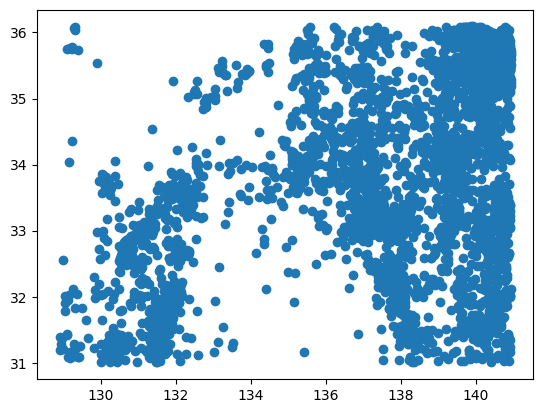

In [6]:
plt.scatter(df['longitude'], df['latitude'])

<Axes: xlabel='longitude', ylabel='latitude'>

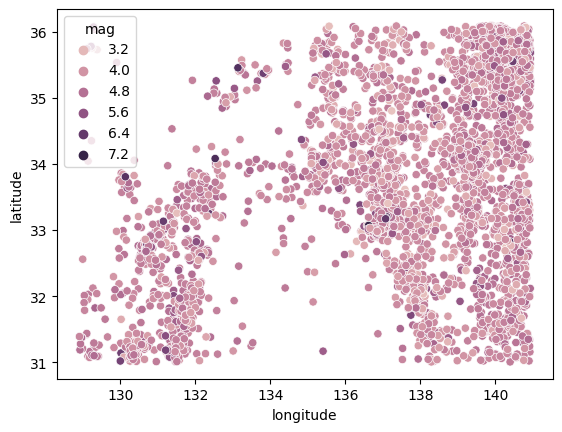

In [7]:
import seaborn as sns

sns.scatterplot(x='longitude', y='latitude', data=df, hue='mag')

In [8]:
import geopandas as gpd
from shapely.geometry import Point


In [9]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

gdf = gpd.GeoDataFrame(df, geometry=geometry)

gdf.set_crs(epsg=4326, inplace=True)

time  latitude  longitude    depth  mag magType  \
0     2024-09-24T06:00:53.328Z   31.3961   140.0063   62.992  4.6      mb   
1     2024-09-23T23:14:19.526Z   31.5463   140.0638   11.710  5.6     mww   
2     2024-09-21T15:57:50.402Z   31.1565   140.9208   40.337  4.4      mb   
3     2024-09-20T12:22:20.539Z   33.2622   132.2763   50.692  4.9      mb   
4     2024-09-19T09:18:10.282Z   35.6655   140.9251   43.764  4.6      mb   
...                        ...       ...        ...      ...  ...     ...   
4801  1999-01-24T20:03:12.050Z   32.5280   132.4670   33.000  4.0      mb   
4802  1999-01-23T19:17:17.750Z   33.6660   138.3260  283.900  4.7      mb   
4803  1999-01-11T00:10:42.220Z   35.9320   136.7080   33.000  4.5      mb   
4804  1999-01-09T18:15:27.340Z   32.3230   136.7300   33.000  4.0      mb   
4805  1999-01-01T14:30:07.510Z   33.3120   130.9950   10.000  4.1      mb   

        nst    gap   dmin   rms  ...                          place  \
0      40.0  134.0  4.664  0.89  ...      Izu Islands, Japan region   
1     110.0   86.0  1.579  1.07  ...      Izu Islands, Japan region   
2      67.0  132.0  2.167  0.54  ...      Izu Islands, Japan region   
3      75.0   56.0  1.416  0.92  ...  26 km SW of Yawatahama, Japan   
4      37.0  119.0  2.367  1.65  ...      11 km SE of Hasaki, Japan   
...     ...    ...    ...   ...  ...                            ...   
4801    NaN    NaN    NaN  1.36  ...     51 km SSW of Sukumo, Japan   
4802    NaN    NaN    NaN  0.81  ...       104 km S of ?yama, Japan   
4803    NaN    NaN    NaN  0.99  ...        20 km ESE of Ono, Japan   
4804    NaN    NaN    NaN  0.72  ...    171 km SSE of Shing?, Japan   
4805    NaN    NaN    NaN  0.59  ...        5 km ESE of Hita, Japan   

            type horizontalError depthError magError  magNst    status  \
0     earthquake           11.04      8.591    0.105    27.0  reviewed   
1     earthquake            7.31      4.231    0.053    34.0  reviewed   
2     earthquake            5.78      7.628    0.076    51.0  reviewed   
3     earthquake            5.90      6.386    0.038   225.0  reviewed   
4     earthquake            7.18      7.662    0.105    27.0  reviewed   
...          ...             ...        ...      ...     ...       ...   
4801  earthquake             NaN        NaN      NaN     3.0  reviewed   
4802  earthquake             NaN      4.600      NaN    58.0  reviewed   
4803  earthquake             NaN        NaN      NaN    14.0  reviewed   
4804  earthquake             NaN        NaN      NaN     1.0  reviewed   
4805  earthquake             NaN        NaN      NaN     3.0  reviewed   

      locationSource  magSource                    geometry  
0                 us         us  POINT (140.00630 31.39610)  
1                 us         us  POINT (140.06380 31.54630)  
2                 us         us  POINT (140.92080 31.15650)  
3                 us         us  POINT (132.27630 33.26220)  
4                 us         us  POINT (140.92510 35.66550)  
...              ...        ...                         ...  
4801              us         us  POINT (132.46700 32.52800)  
4802              us         us  POINT (138.32600 33.66600)  
4803              us         us  POINT (136.70800 35.93200)  
4804              us         us  POINT (136.73000 32.32300)  
4805              us         us  POINT (130.99500 33.31200)  

[4806 rows x 23 columns]

/var/folders/vw/rm1q12851jq6ww7xsgf4g0x00000gn/T/ipykernel_30695/58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

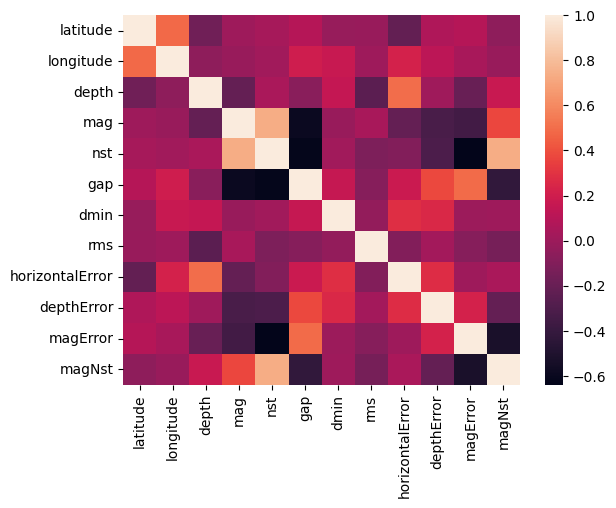

In [10]:
sns.heatmap(df.corr())

In [11]:
df['time'] = pd.to_datetime(df['time'])

<Axes: title={'center': 'Earthquakes over time'}, xlabel=' Year ', ylabel='Number of earthquakes'>

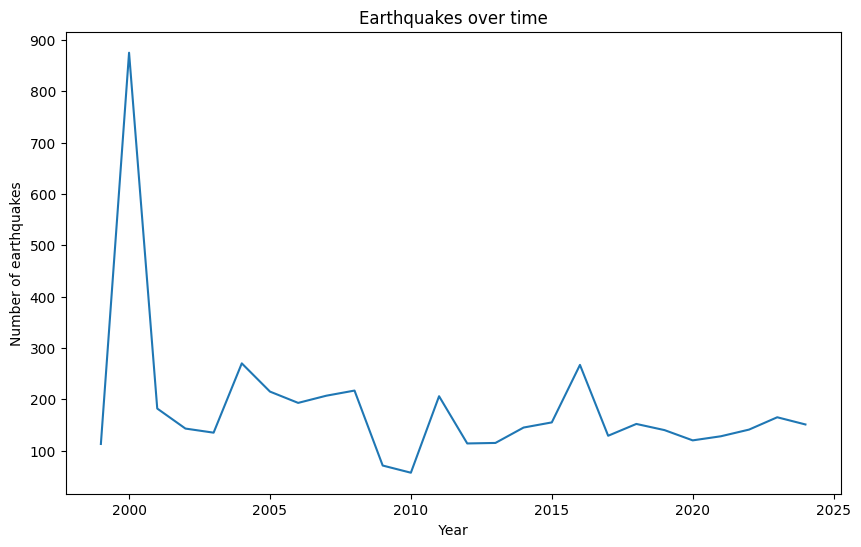

In [13]:
# create a plot of occurences over time
df['time'].dt.year.value_counts().sort_index().plot(title='Earthquakes over time', xlabel=' Year ', ylabel='Number of earthquakes', figsize=(10, 6))

<Axes: title={'center': 'Distribution of magnitudes'}, ylabel='Frequency'>

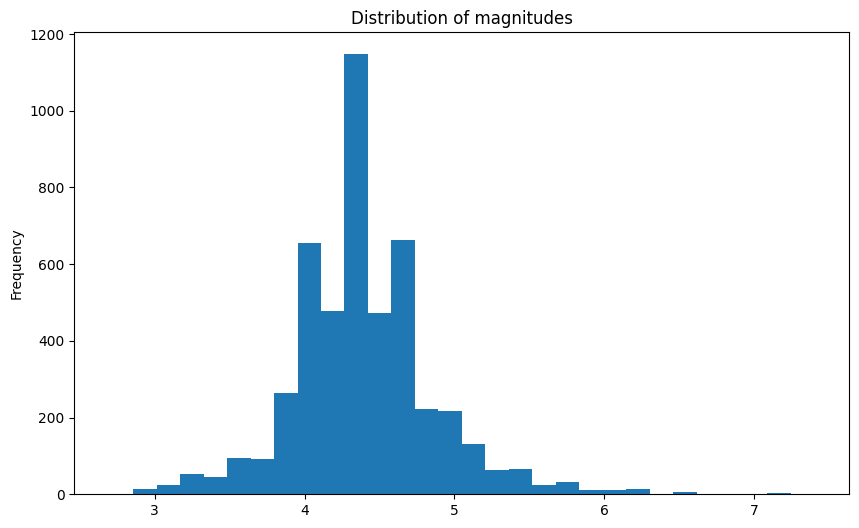

In [14]:
# create a plot that displays a distribution of magnitudes
df['mag'].plot(kind='hist', bins=30, title='Distribution of magnitudes', xlabel='Magnitude', ylabel='Number of earthquakes', figsize=(10, 6))


szymekkart250

<Axes: title={'center': 'Average magnitude per month'}, xlabel='Month', ylabel='Magnitude'>

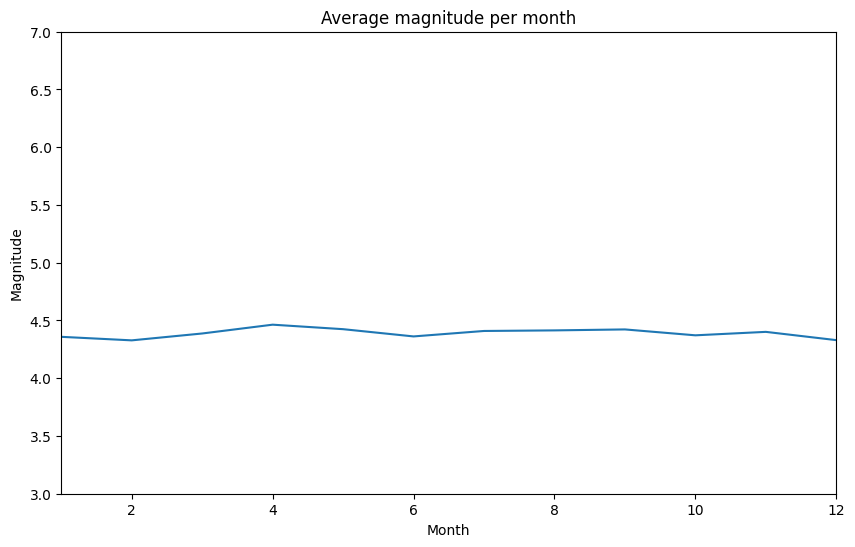

In [15]:
# do a plot of a magnitude per month
df['month'] = df['time'].dt.month
df.groupby('month')['mag'].mean().plot(title='Average magnitude per month', xlabel='Month', ylabel='Magnitude', figsize=(10, 6), xlim=(1, 12), ylim=(3,7))

# no big differences across the average magnitudes in different months

<Axes: title={'center': 'Average magnitude per year'}, xlabel='Year', ylabel='Magnitude'>

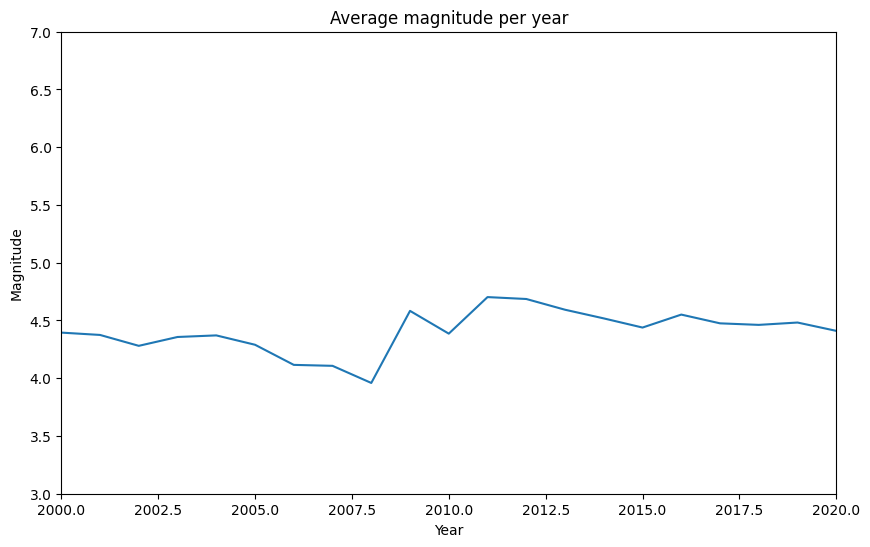

In [16]:
# do a subplots of magnitude per month
# df.groupby(['year', 'month'])['mag'].mean().unstack().plot(title='Average magnitude per month', xlabel='Month', ylabel='Magnitude', figsize=(10, 6), xlim=(1, 12), ylim=(3,7))

# do a plot of a magnitude per year
df['year'] = df['time'].dt.year
df.groupby('year')['mag'].mean().plot(title='Average magnitude per year', xlabel='Year', ylabel='Magnitude', figsize=(10, 6), xlim=(2000, 2020), ylim=(3,7))


# Noticeable spike around 2008/2009

In [19]:
minx, miny, maxx, maxy = gdf.total_bounds

padding = 0.5  # degrees of longitude/latitude
minx -= padding
miny -= padding
maxx += padding
maxy += padding

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.to_crs(epsg=4326)  # Ensure CRS is WGS84

In [20]:
from shapely.geometry import box

bbox = box(minx, miny, maxx, maxy)
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs='EPSG:4326')

# Clip the world map to the bounding box
world_clipped = gpd.clip(world, geo)

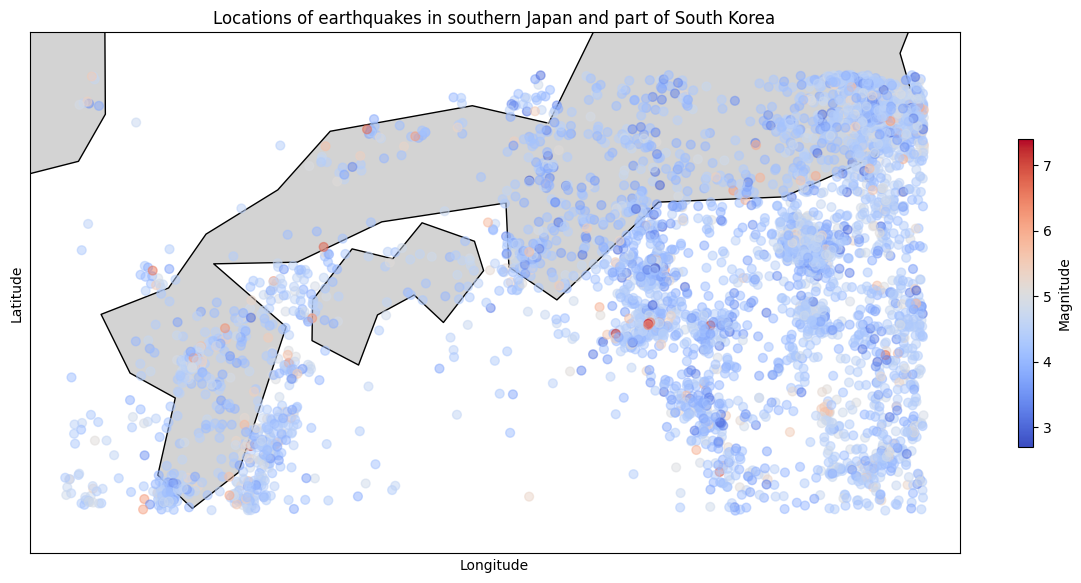

In [21]:
fig, ax = plt.subplots(figsize=(15, 20))
world_clipped.plot(ax=ax, color='lightgray', edgecolor='black')

ax.set_xticks([])
ax.set_yticks([])

# Plot your data
gdf.plot(
        ax=ax, 
        marker='o',
        markersize=40, 
        alpha=0.5,     
        column='mag',  # Column to use for color mapping
        cmap='coolwarm',       # Colormap (you can choose any matplotlib colormap)
        legend=True,  # Show the legend
        legend_kwds={
            'label': "Magnitude",
            'orientation': "vertical",
                    'shrink': 0.2,      # Shrink the colorbar size
        'aspect': 20        # Aspect ratio of the colorbar
        }
    )

# Set x and y limits to focus on your data
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Locations of earthquakes in southern Japan and part of South Korea')

plt.show()

In [22]:
import numpy as np

grid_size = 100  # Adjust as needed for resolution

# Create grid edges
x_edges = np.linspace(minx, maxx, grid_size)
y_edges = np.linspace(miny, maxy, grid_size)

In [23]:
# Extract longitude and latitude
x = gdf.geometry.x
y = gdf.geometry.y

# Compute the 2D histogram
heatmap, xedges, yedges = np.histogram2d(y, x, bins=(y_edges, x_edges))

In [24]:
heatmap = np.flipud(heatmap.T)


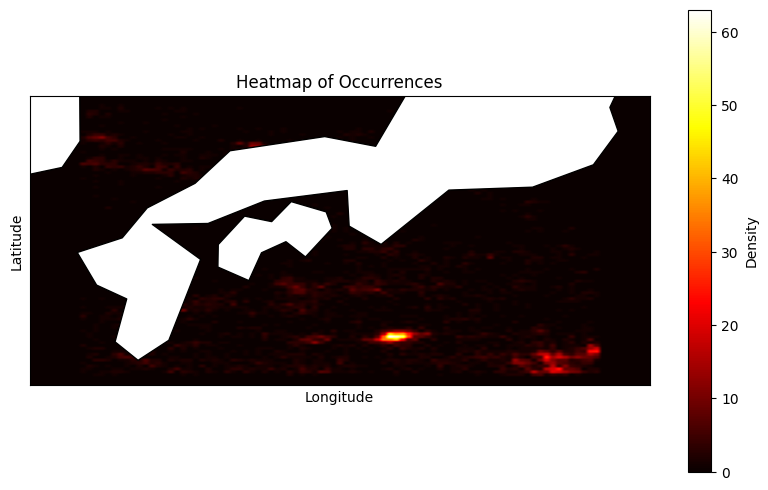

In [25]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Load the base map and clip it to your data's extent
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.to_crs(epsg=4326)  # Ensure CRS is WGS84

# Clip the base map
from shapely.geometry import box
bbox = box(minx, miny, maxx, maxy)
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs='EPSG:4326')
world_clipped = gpd.clip(world, geo)

# Plot the base map
world_clipped.plot(ax=ax, color='white', edgecolor='black')

# Plot the heatmap
extent = [minx, maxx, miny, maxy]  # Note that extent is [xmin, xmax, ymin, ymax]
cax = ax.imshow(
    heatmap,
    extent=extent,
    cmap='hot',  # You can choose other colormaps like 'hot', 'viridis', etc.
    # alpha=0.6,   # Adjust transparency
    origin='lower'  # Ensure origin matches the coordinate system
)

# Add a colorbar
cbar = fig.colorbar(cax, ax=ax, orientation='vertical')
cbar.set_label('Density')

# Set the extent
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Add titles and labels
ax.set_title('Heatmap of Occurrences')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [26]:
from scipy.stats import gaussian_kde

# Extract coordinates
coords = np.vstack([x, y])

# Perform KDE
kde = gaussian_kde(coords)

# Create grid coordinates
xi, yi = np.meshgrid(x_edges, y_edges)
zi = kde(np.vstack([xi.flatten(), yi.flatten()]))

# Reshape and transpose for plotting
zi = zi.reshape(xi.shape).T

# Plot the KDE heatmap
cax = ax.imshow(
    np.flipud(zi),
    extent=extent,
    cmap='hot',
    alpha=0.6,
    origin='lower'
)

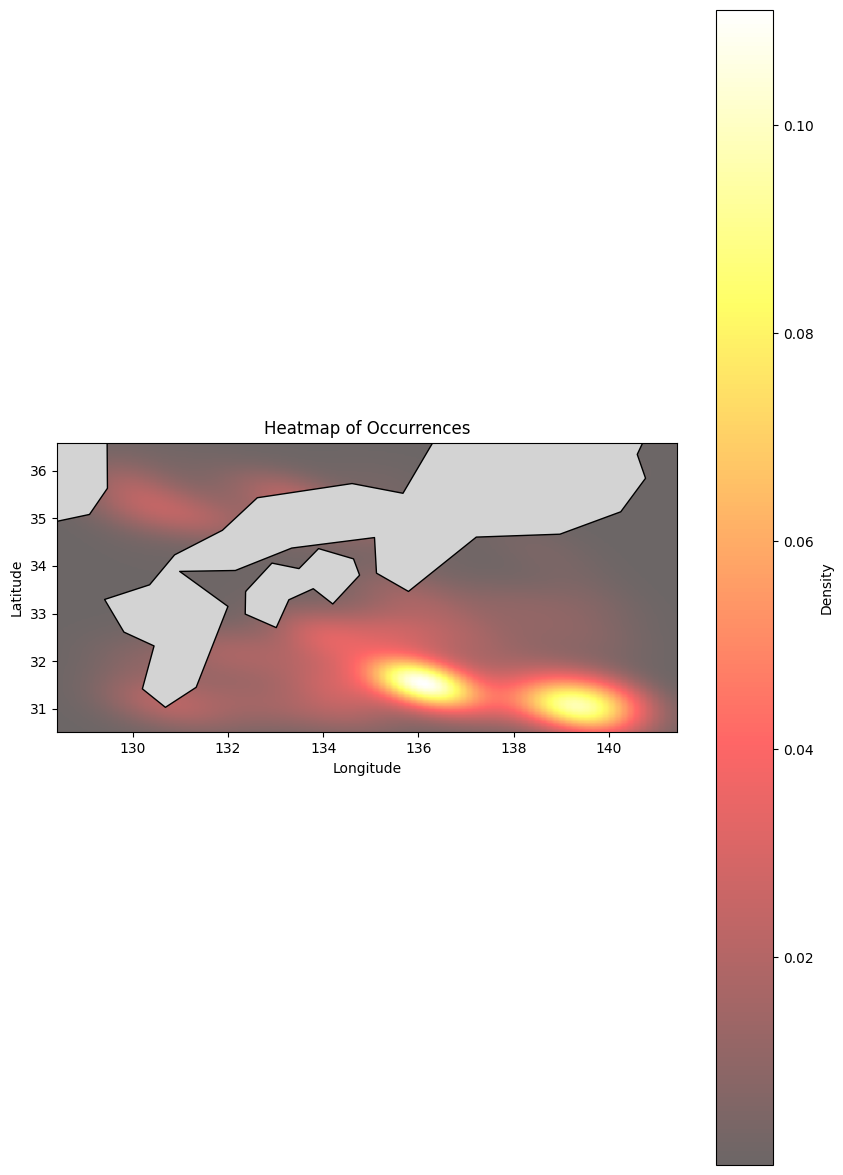

In [27]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)
gdf.set_crs(epsg=4326, inplace=True)

# Define the Map Extent
minx, miny, maxx, maxy = gdf.total_bounds
padding = 0.5
minx -= padding
miny -= padding
maxx += padding
maxy += padding

# 2. Create a Heatmap Layer
x = gdf.geometry.x
y = gdf.geometry.y

# Grid definition
grid_size = 100
x_edges = np.linspace(minx, maxx, grid_size)
y_edges = np.linspace(miny, maxy, grid_size)

# KDE for smoother heatmap
coords = np.vstack([x, y])
kde = gaussian_kde(coords)
xi, yi = np.meshgrid(x_edges, y_edges)
zi = kde(np.vstack([xi.flatten(), yi.flatten()]))

# Reshape zi to match grid
zi = zi.reshape(xi.shape).T

# 3. Overlay the Heatmap on the Map
# Create the plot
fig, ax = plt.subplots(figsize=(10, 15))

# Load and clip the base map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.to_crs(epsg=4326)
bbox = box(minx, miny, maxx, maxy)
geo = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs='EPSG:4326')
world_clipped = gpd.clip(world, geo)

# Plot the base map
world_clipped.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the heatmap
cax = ax.imshow(
    np.flipud(zi),
    extent=[minx, maxx, miny, maxy],
    cmap='hot',
    alpha=0.6,
    origin='lower'
)

# Add the colorbar
cbar = fig.colorbar(cax, ax=ax, orientation='vertical')
cbar.set_label('Density')

# Set the extent
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Add titles and labels
ax.set_title('Heatmap of Occurrences')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

In [42]:
import folium
from folium.plugins import HeatMap
from branca.element import Template, MacroElement


# Create a base map
m = folium.Map(location=[(miny + maxy) / 2, (minx + maxx) / 2], zoom_start=6)

# Prepare data for heatmap
heat_data = [
    [row['latitude'], row['longitude'], row['mag']] for index, row in gdf.iterrows()
]
gradient = {
    0.4: 'rgba(0, 0, 255, 0.3)',     # Transparent blue
    0.8: 'rgba(0, 255, 0, 0.1)',   # Semi-transparent green
    1.0: 'rgba(255, 0, 0, 0.1)'    # Less transparent red
}
# Add the heatmap layer with weights
HeatMap(heat_data, max_zoom=13, radius=15, gradient=gradient).add_to(m)
# Add the heatmap layer
# HeatMap(heat_data,
#                 # min_opacity=0.4,
#         # max_val = 0.5
#         gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}
#         ).add_to(folium.FeatureGroup(name='Heat Map').add_to(m))
legend_html = '''
{% macro html(this, kwargs) %}

<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 150px;
    height: 90px;
    background-color: white;
    border:2px solid grey;
    z-index:9999;
    font-size:14px;
    ">
    &nbsp;<b>Magnitude Legend</b><br>
    &nbsp;<i class="fa fa-circle" style="color:rgba(0, 0, 255, 0.8)"></i>&nbsp;Low<br>
    &nbsp;<i class="fa fa-circle" style="color:rgba(0, 255, 0, 0.8)"></i>&nbsp;Medium<br>
    &nbsp;<i class="fa fa-circle" style="color:rgba(255, 0, 0, 0.8)"></i>&nbsp;High
</div>

{% endmacro %}
'''

# Add the legend to the map
template = Template(legend_html)
macro = MacroElement()
macro._template = template
m.get_root().add_child(macro)

# Display the map
m

In [35]:
map_center = [df['latitude'].mean(), df['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)
import branca.colormap as cm

# Define the colormap (e.g., linear gradient from blue to red)
min_mag = df['mag'].min()
max_mag = df['mag'].max()
colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow', 'red'],
                             vmin=min_mag, vmax=max_mag,
                             caption='Magnitude')

# Add the colormap legend to the map
colormap.add_to(m)

for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,  # Adjust radius as needed
        fill=True,
        fill_color=colormap(row['mag']),
        color=colormap(row['mag']),  # Outline color
        fill_opacity=0.7,
        popup=f"Magnitude: {row['mag']}"
    ).add_to(m)

m

### Plan EDA
* Group by region
* check the distributrion of eq over time by region 
* are there seasonal effects
* something about magnitudes

# Plan method of moments (part 1.2)
* Perform distribution fitting
* same but for eq with magnitude of over and less than 5
* do moments of the above


### Part 2
* 
